<a href="https://colab.research.google.com/github/sarabjeet050/Buyume-ML-Assignment-Image-Processing/blob/main/Buyume_ML_Assignment_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Pre-processed Image


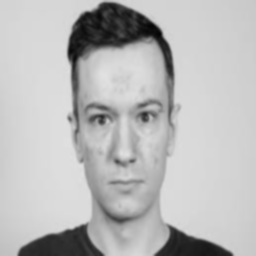

In [ ]:
import urllib.request
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Online image url
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfX4Fij5X2_gG5JO72Q4zRc0xfw1Ertdjpig&usqp=CAU"

# Download the image and save it locally
urllib.request.urlretrieve(url, "example_face.jpg")

# Read in an example face image
img = cv2.imread("example_face.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize the image to a standard size (e.g. 256x256)
resized = cv2.resize(gray, (256, 256))

# Apply a Gaussian blur to reduce noise and artifacts
blurred = cv2.GaussianBlur(resized, (5, 5), 0)

# Display the pre-processed image
print("Pre-processed Image")
cv2_imshow( blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import os
import numpy as np
# from skimage import io, transform
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# import requests
import urllib.request

# Define a function to download and pre-process a single image
def download_image(url):
    url = urllib.request.urlretrieve(url, "sample.jpg")
    # response = requests.get(url)
    # print(response.content)
    img = cv2.imread("sample.jpg")
    # img = io.imread(response.content, as_gray=True)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (256, 256))
    # img = transform.resize(img, (256, 256))
    # return img.flatten()
    return resized.flatten()

# Define a function to load and pre-process a dataset of online images
def load_dataset(urls_and_labels):
    images = []
    labels = []
    for url, label in urls_and_labels:
        img = download_image(url)
        images.append(img)
        labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Define a list of URLs and corresponding labels for the online images
url1 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfX4Fij5X2_gG5JO72Q4zRc0xfw1Ertdjpig&usqp=CAU"
url2 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6yYTR5VN4JQLT0-1nogT3IVSbIUJM4a5JdnJARQNrYj0A2Oz0LwCp_Rb-QPDJi_zbheA&usqp=CAU"
urls_and_labels = [
    (url1, "acne"),
    (url2, "oiliness")
    # add more URLs and labels as needed
]

# Load the dataset of online labeled face images
X, y = load_dataset(urls_and_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a support vector machine (SVM) classifier on the training set
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# # Evaluate the classifier on the testing set
accuracy = clf.score(X_test, y_test)
print("Accuracy: %.2f" % accuracy)


ValueError: ignored